In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math 

In [2]:
# reading all the .csv file 
Fe_dataframe = pd.read_csv("/content/LPFe_Map.csv",header = None)
K_dataframe = pd.read_csv("/content/LPK_Map.csv",header = None)
Th_dataframe = pd.read_csv("/content/LPTh_Map.csv",header = None)
Ti_dataframe = pd.read_csv("/content/LPTi_Map.csv",header = None)
Albedo_dataframe = pd.read_csv("/content/Albedo_Map.csv",header = None)

In [3]:
# a function which plots graphs of a dataframe
def make_plot_dataframe (dataframe) :
  plt.figure(figsize=(8,5),dpi = 100)
  plt.imshow(dataframe)
  plt.colorbar()
  plt.show()

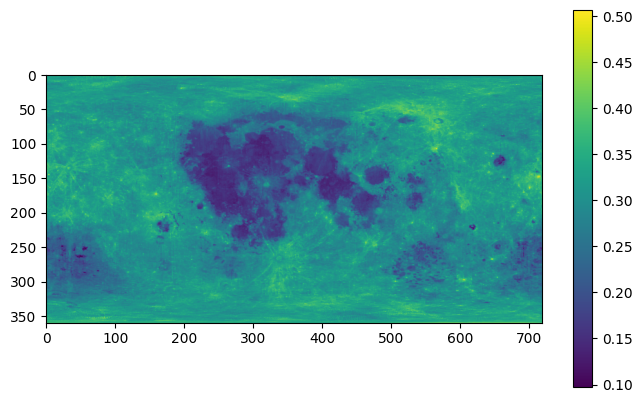

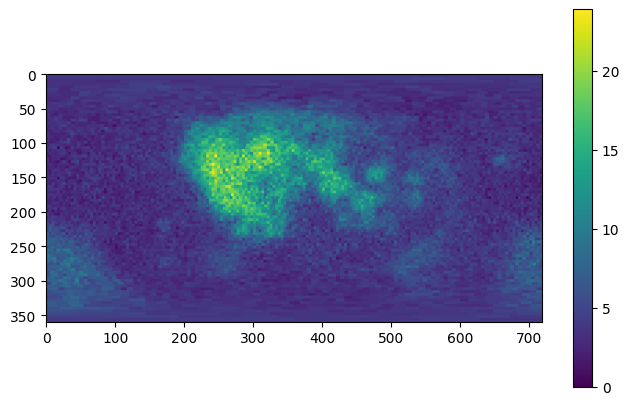

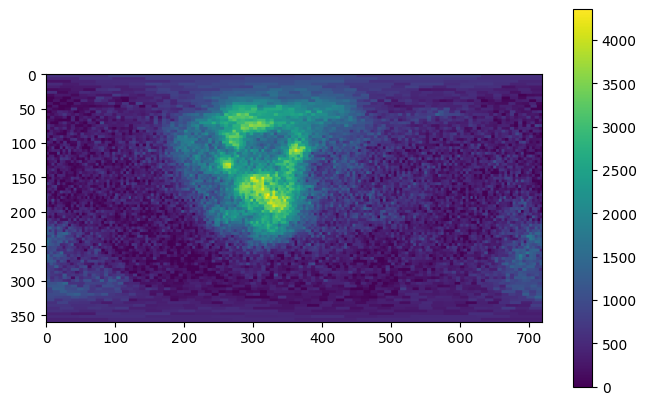

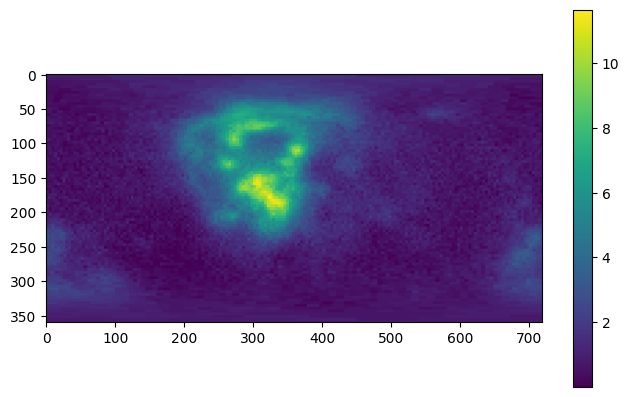

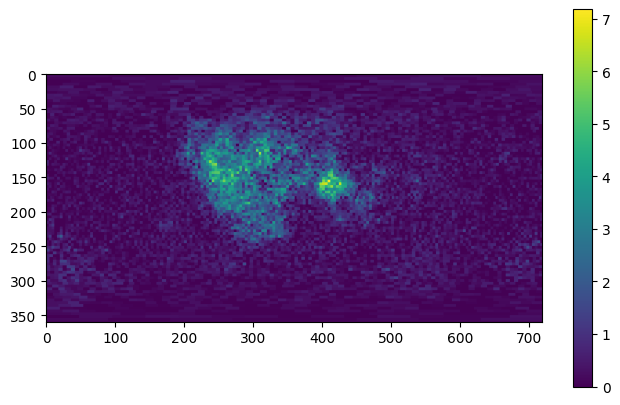

In [4]:
# making plots of each dataframe
make_plot_dataframe(Albedo_dataframe)
make_plot_dataframe(Fe_dataframe)
make_plot_dataframe(K_dataframe)
make_plot_dataframe(Th_dataframe)
make_plot_dataframe(Ti_dataframe)

In [5]:
# give_train_test split the data in two part left and right with equal columns
def give_train_test (dataframe):
  train = dataframe.iloc[:,  0 :int(len(dataframe.columns)/2)]
  test = dataframe.iloc[:,int(len(dataframe.columns)/2): len((dataframe.columns) + 1)]
  return train,test

In [6]:
# all the .csv file are splitted into two part with help of give_train_test
Fe_train,Fe_test = give_train_test(Fe_dataframe)
K_train,K_test = give_train_test(K_dataframe)
Th_train,Th_test = give_train_test(Th_dataframe)
Ti_train,Ti_test = give_train_test(Ti_dataframe)
Albedo_train,Albedo_test = give_train_test(Albedo_dataframe)

In [7]:
# this function to change dataframe to a list 
def make_list (final_list, dataframe):
  for index,row in dataframe.iterrows():
    for column in dataframe:
      final_list.append(row[column])
  return final_list

In [8]:
# creating empty list for all the train test data
Fe_train_list = []
K_train_list = []
Th_train_list = []
Ti_train_list = []
Albedo_train_list = []
Fe_test_list = []
K_test_list = []
Th_test_list = []
Ti_test_list = []
Albedo_test_list = []

In [9]:
# all lists of data is made with help of make_list function
Fe_train_list = make_list(Fe_train_list,Fe_train)
K_train_list = make_list(K_train_list,K_train)
Th_train_list = make_list(Th_train_list,Th_train)
Ti_train_list = make_list(Ti_train_list,Ti_train)
Albedo_train_list = make_list(Albedo_train_list,Albedo_train)

Fe_test_list = make_list(Fe_test_list,Fe_test)
K_test_list = make_list(K_test_list,K_test)
Th_test_list = make_list(Th_test_list,Th_test)
Ti_test_list = make_list(Ti_test_list,Ti_test)
Albedo_test_list = make_list(Albedo_test_list,Albedo_test)

In [10]:
# a train_dataset is made along with a test_dataset consisting of columns of ['Fe','K','Th','Ti','Albedo']
train_dataframe = pd.DataFrame(Fe_train_list,columns = ['Fe'])
train_dataframe["K"] = K_train_list
train_dataframe["Th"] = Th_train_list
train_dataframe["Ti"] = Ti_train_list
train_dataframe["Albedo"] = Albedo_train_list

test_dataframe = pd.DataFrame(Fe_test_list,columns = ['Fe'])
test_dataframe["K"] = K_test_list
test_dataframe["Th"] = Th_test_list
test_dataframe["Ti"] = Ti_test_list
test_dataframe["Albedo"] = Albedo_test_list

In [11]:
train_dataframe.corr()['Albedo']
# As we can clearly see that for this particular dataset, coorelation with element composition are very high (negative)

Fe       -0.851169
K        -0.644436
Th       -0.669347
Ti       -0.747507
Albedo    1.000000
Name: Albedo, dtype: float64

In [12]:
# model 1: Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"])
print(model.score(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]))
predict  = model.predict(test_dataframe[["Fe","K","Th","Ti"]])

# checking the efficiency of the model
print(r2_score(test_dataframe['Albedo'],predict))

0.7269158706406238
0.5442796944086716


In [13]:
# model 2 : Ridge Regression
from sklearn.linear_model import Ridge
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for alpha in alpha_ridge:
  clf = Ridge(alpha =  alpha)
  print(alpha)
  clf.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]) 
  print(clf.score(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]))
  print(clf.score(test_dataframe[["Fe","K","Th","Ti"]],test_dataframe["Albedo"],))


1e-15
0.7269158706406238
0.5442796944086716
1e-10
0.7269158706406238
0.5442796944086716
1e-08
0.7269158706406238
0.5442796944086699
0.0001
0.7269158706406238
0.5442796943915147
0.001
0.7269158706406238
0.5442796942371033
0.01
0.7269158706406237
0.54427969269299
1
0.7269158706391678
0.5442795228394737
5
0.7269158706042314
0.5442788365418018
10
0.7269158704950948
0.5442779786227677
20
0.7269158700588321
0.5442762626284627


In [14]:
# model 3 : Lasso Regression
from sklearn.linear_model import Lasso
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for alpha in alpha_lasso:
  clf = Lasso(alpha =  alpha)
  print(alpha)
  clf.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]) 
  print(clf.score(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]))
  print(clf.score(test_dataframe[["Fe","K","Th","Ti"]],test_dataframe["Albedo"]))

1e-15
0.7269158706406238
0.5442796944086679
1e-10
0.7269158706406238
0.5442796940002386
1e-08
0.726915870640426
0.5442796535651159
0.0001
0.7269049885157342
0.5439827274679779
0.001
0.725997271802789
0.5410536255534892
0.01
0.720693331061853
0.5198312178669895
1
0.41485381059289783
0.11030090405770665
5
0.40421225726486376
0.11311349875094533
10
0.3709574031147568
0.10508268831346368
20
0.2379379865143295
0.050532554758401016


In [15]:
# model 4 : BayesianRidge() model
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]) 
print(clf.score(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]))
print(clf.score(test_dataframe[["Fe","K","Th","Ti"]],test_dataframe["Albedo"]))

0.7269158697618419
0.5442754760476233


In [16]:
# model 5 : RandomForestRegressor() model
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
regressor.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"])
print(regressor.score(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]))

predict = regressor.predict(test_dataframe[["Fe","K","Th","Ti"]])
print(r2_score(test_dataframe['Albedo'],predict))

0.944672004700038
0.47473977740945106


In [17]:
# model 6 : Neural Network

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten,InputLayer, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from sklearn.metrics import accuracy_score

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_dataframe[["Fe","K","Th","Ti"]].shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(4, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


NN_model.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"], epochs=50, batch_size=32, validation_data=(test_dataframe[["Fe","K","Th","Ti"]],test_dataframe["Albedo"]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 10,009
Trainable params: 10,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4050/4050 [==============================] - 9s 2ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - val

In [18]:
predict = NN_model.predict(test_dataframe[["Fe","K","Th","Ti"]])
print(r2_score(test_dataframe['Albedo'],predict))

0.5709833229007746


### As we can see by running different model the score value has only changed a little bit,  
# For consideration and evaluation I am considering my first model , Linear_Regression model

In [24]:
# As we can see by running different model the score value has only changed a little bit,  
# For consideration and evaluation I am considering my first model , Linear_Regression model
# for knowing how well my model performed,
# mean_squared_error, R00t_mean_squared_error, mean_absolute_error and R2_score is calculated.

# model 1: Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"])
print(model.score(train_dataframe[["Fe","K","Th","Ti"]],train_dataframe["Albedo"]))

predict = model.predict(test_dataframe[["Fe","K","Th","Ti"]])
print("Mean_square_error",mean_squared_error(test_dataframe['Albedo'], predict))
print("Mean_absolute_error",mean_absolute_error(test_dataframe['Albedo'],predict))
print("R2_score",r2_score(test_dataframe['Albedo'],predict))
print("Coefficient of model",model.coef_)
print("Intercept of model",model.intercept_)

0.7269158706406238
Mean_square_error 0.001024964332512852
Mean_absolute_error 0.024632802974360015
R2_score 0.5442796944086716
Coefficient of model [-1.06010114e-02 -1.59992110e-06  1.23225363e-04 -5.73555018e-03]
Intercept of model 0.35117746313043313


# As we can see that r2_score is around 0.54 which means did not performed well in our dataset ,higher R2 value better the model.

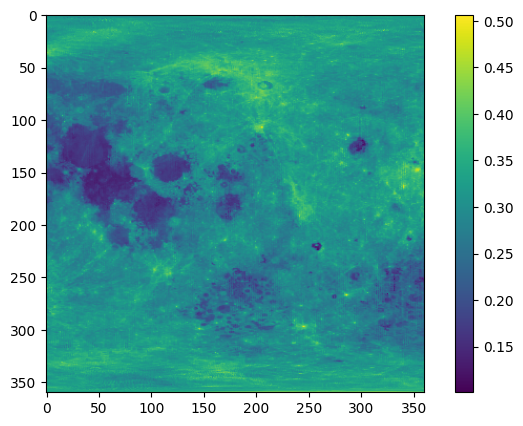

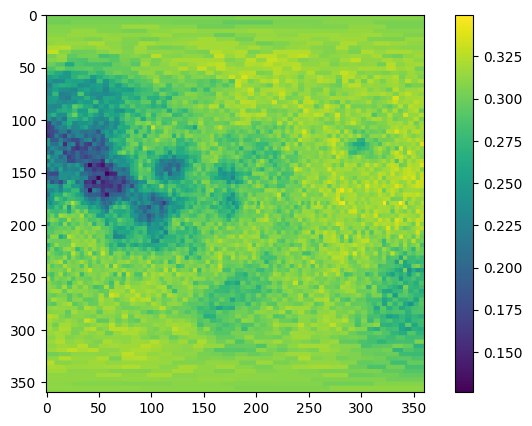

In [20]:
# plot showing Albedo_test given data and plot of predicted data
final = pd.DataFrame(predict.reshape(360,360))
make_plot_dataframe(np.array(Albedo_test_list).reshape(360,360))
make_plot_dataframe(final)

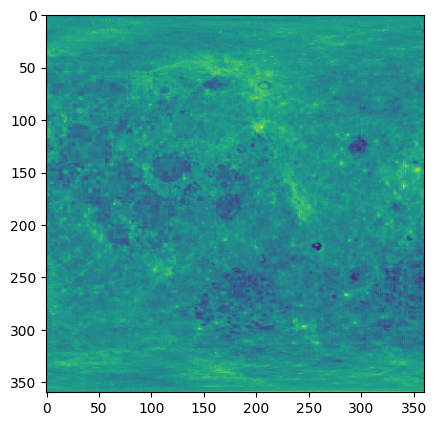

In [21]:
# a residual dataframe is also made and plotted to know where the diferences are more
predicted_dataframe = pd.DataFrame(predict.reshape(360,360),columns = range(360,720))
residual_dataframe = Albedo_test - predicted_dataframe
plt.figure(figsize=(8,5),dpi = 100 )
plt.imshow(residual_dataframe)
plt.show()

0.0005728818568390274


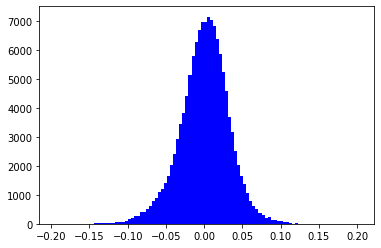

In [22]:
# a histogram with 100 bins is also made of residual data, which shows that error is somewhat standarize with having a mean around zero . which is proved when mean of residual_list is calculated.
residual_list = Albedo_test_list - predict
plt.hist(residual_list,bins = 100, color = 'blue')
print(residual_list.mean())

In [23]:
predicted_dataframe.to_csv("/content/predicted_Albedo.csv",index = False,header = False)